## The usual preamble

> Note We're instantiating the larcv IOManager. This sets up static variables which are used by the compiled software.

I'm going to leave out much the explanation here as many of the mechanics are similar to what we had before.

In [1]:
from larcv import larcv
larcv.IOManager
from ROOT import TChain
import numpy as np
import scipy.misc as smp

Welcome to ROOTaaS 6.06/08


The snippet below should be familiar from the previous notebook. This is set to pull out the particle and ROI information.

In [2]:
roi_tree_name='partroi_tpc_hires_crop_tree'
roi_br_name=roi_tree_name.replace('tree','branch')
roi_ch = TChain(roi_tree_name)
roi_ch.AddFile('../test.root')

1

## ROI and Bounding Boxes

In [3]:
roi_ch.GetEntry(0)
roi_br=getattr(roi_ch, roi_br_name)
bb_array = roi_br.ROIArray()
bb = bb_array.at(0)
print bb.dump()
print dir(bb)

      Particle Unknown (PdgCode,TrackID) = (11,4294967295) ... with Parent (0,4294967295)
      Vertex   (x, y, z, t) = (69.1354,80.4858,630.047,1397.42)
      Momentum (px, py, pz) = (-803.985,-156.442,42.744)
      Inittial Energy = 820.178
      Deposit  Energy = 727.087
      # Bounding Box  = 3
          Plane 0 (rows,cols) = (234,162) ... Left Top (1018,4594) ... Right Bottom (1342,3190)
          Plane 1 (rows,cols) = (234,150) ... Left Top (1430,4594) ... Right Bottom (1730,3190)
          Plane 2 (rows,cols) = (234,151) ... Left Top (1930,4594) ... Right Bottom (2232,3190)


['AppendBB', 'BB', 'EnergyDeposit', 'EnergyInit', 'Index', 'MCSTIndex', 'MCTIndex', 'Momentum', 'NuCurrentType', 'NuInteractionType', 'ParentMomentum', 'ParentPdgCode', 'ParentPosition', 'ParentPx', 'ParentPy', 'ParentPz', 'ParentT', 'ParentTrackID', 'ParentX', 'ParentY', 'ParentZ', 'PdgCode', 'Position', 'Px', 'Py', 'Pz', 'SetBB', 'Shape', 'T', 'TrackID', 'Type', 'X', 'Y', 'Z', '__add__', '__assign__', '_

## PMT Information

The PMT information is an additional map of light information overlaid on top of the data. This can be used to correlate light with charge information.

In [4]:
pmt_tree_name='image2d_pmt_tree'
pmt_br_name=pmt_tree_name.replace('tree','branch')
pmt_ch = TChain(pmt_tree_name)
pmt_ch.AddFile('../test.root')

pmt_ch.GetEntry(0)
pmt_br=getattr(pmt_ch, pmt_br_name)
pmt_array = pmt_br.Image2DArray()
print pmt_array.size()
pmt_image = pmt_array.at(0)
print pmt_image.meta().dump()

1
Plane 65535 (rows,cols) = (1500,32) ... Left Top (0,1499) ... Right Bottom (32,-1)



## Painting PMT Information

This can be used to visualize the PMT information.

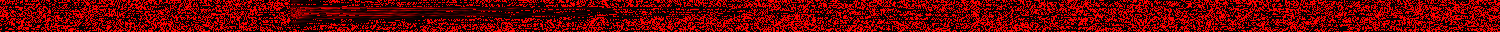

In [5]:
data = np.zeros( (32,1500,3), dtype=np.uint8 )
for i in range(1500):
    for j in range(32):
        data[j,i] = [pmt_br.at(0).pixel(i,j),0,0] 
img = smp.toimage( data )       # Create a PIL image
img.save('pmt_image.png')
from IPython.display import Image
Image(filename='pmt_image.png') 

## Segment Information

In [6]:
seg_tree_name='image2d_segment_hires_crop_tree'
seg_br_name=seg_tree_name.replace('tree','branch')
seg_ch = TChain(seg_tree_name)
seg_ch.AddFile('../test.root')

seg_ch.GetEntry(0)
seg_br=getattr(seg_ch, seg_br_name)
seg_array = seg_br.Image2DArray()
print seg_array.size()
seg_image = seg_array.at(0)
print seg_image.meta().dump()

3
Plane 0 (rows,cols) = (576,576) ... Left Top (868,5856) ... Right Bottom (2020,2400)



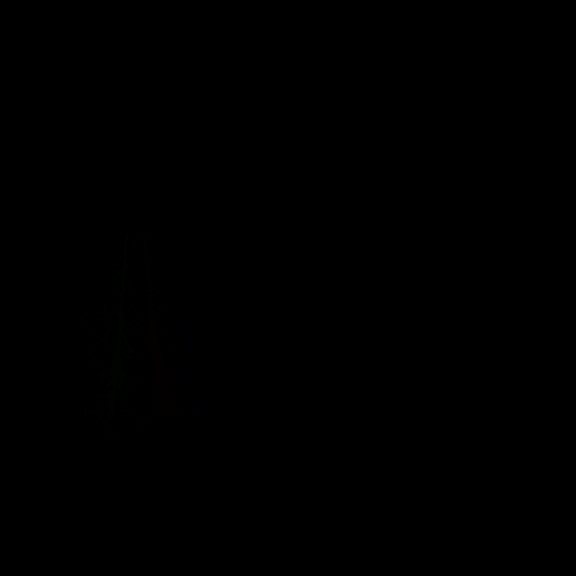

In [7]:
data = np.zeros( (576,576,3), dtype=np.uint8 )
for i in range(576):
    for j in range(576):
        data[i,j] = [seg_br.at(0).pixel(i,j),seg_br.at(1).pixel(i,j),seg_br.at(2).pixel(i,j)] 
img = smp.toimage( data )       # Create a PIL image
img.save('segment_image.png')
from IPython.display import Image
Image(filename='segment_image.png') 

## Channel Status

In [8]:
ch_tree_name='chstatus_tpc_tree'
ch_br_name=ch_tree_name.replace('tree','branch')
ch_ch = TChain(ch_tree_name)
ch_ch.AddFile('../test.root')

ch_ch.GetEntry(0)
ch_br=getattr(ch_ch, ch_br_name)
# Get the status map for a given plane
print "Plane: ", ch_br.Status(2).Plane()
for index, status in enumerate(ch_br.Status(0).as_vector()):
    print "Wire Index: ", index, "  Status: ", status

Plane:  2
Wire Index:  0   Status:  4
Wire Index:  1   Status:  1
Wire Index:  2   Status:  1
Wire Index:  3   Status:  1
Wire Index:  4   Status:  1
Wire Index:  5   Status:  1
Wire Index:  6   Status:  1
Wire Index:  7   Status:  1
Wire Index:  8   Status:  1
Wire Index:  9   Status:  1
Wire Index:  10   Status:  1
Wire Index:  11   Status:  1
Wire Index:  12   Status:  1
Wire Index:  13   Status:  1
Wire Index:  14   Status:  1
Wire Index:  15   Status:  1
Wire Index:  16   Status:  4
Wire Index:  17   Status:  4
Wire Index:  18   Status:  4
Wire Index:  19   Status:  4
Wire Index:  20   Status:  4
Wire Index:  21   Status:  4
Wire Index:  22   Status:  4
Wire Index:  23   Status:  4
Wire Index:  24   Status:  4
Wire Index:  25   Status:  4
Wire Index:  26   Status:  4
Wire Index:  27   Status:  4
Wire Index:  28   Status:  4
Wire Index:  29   Status:  4
Wire Index:  30   Status:  4
Wire Index:  31   Status:  4
Wire Index:  32   Status:  4
Wire Index:  33   Status:  4
Wire Index:  3